### Let's first see how this dataset look like

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reviews = pd.read_csv("data/fine_foods/fine_food_reviews.csv")
reviews.shape

(568454, 10)

In [24]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Cool, let's see the value distribution of user rated scores (1 - 5 stars)

Text(0.5, 1.0, 'Distribution of review scores')

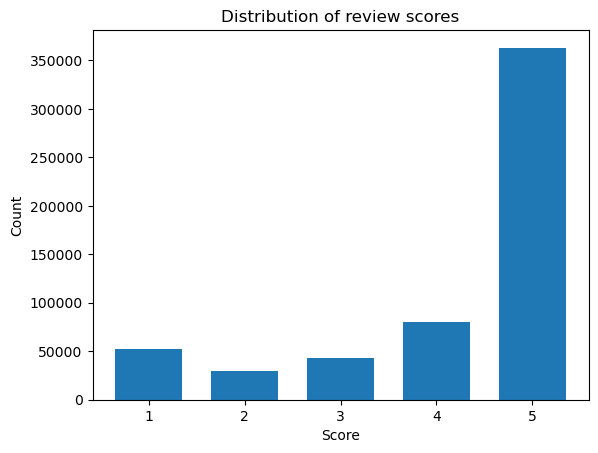

In [25]:
plt.hist(reviews['Score'], bins=5, range=(0.5, 5.5), rwidth=0.7)
plt.ylabel('Count')
plt.xlabel('Score')
plt.title('Distribution of review scores')

### More than just the subjective ratings given by a user, we also want to see how others value each user's comment. Thus, let's filter the dataset to keep the reviews that have useful/notuseful votes

In [26]:
useful_reviews = reviews.loc[reviews['HelpfulnessDenominator'] != 0]
useful_reviews.shape

(298402, 10)

In [27]:
useful_reviews['HelpfulPortion'] = useful_reviews['HelpfulnessNumerator'] / useful_reviews['HelpfulnessDenominator']
useful_reviews.head()

/var/folders/k2/7hr6hcfd5v58p9nhhf_brbbm0000gn/T/ipykernel_46257/2821050564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_reviews['HelpfulPortion'] = useful_reviews['HelpfulnessNumerator'] / useful_reviews['HelpfulnessDenominator']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulPortion
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0


Text(0.5, 1.0, 'Useful votes vs. Total votes')

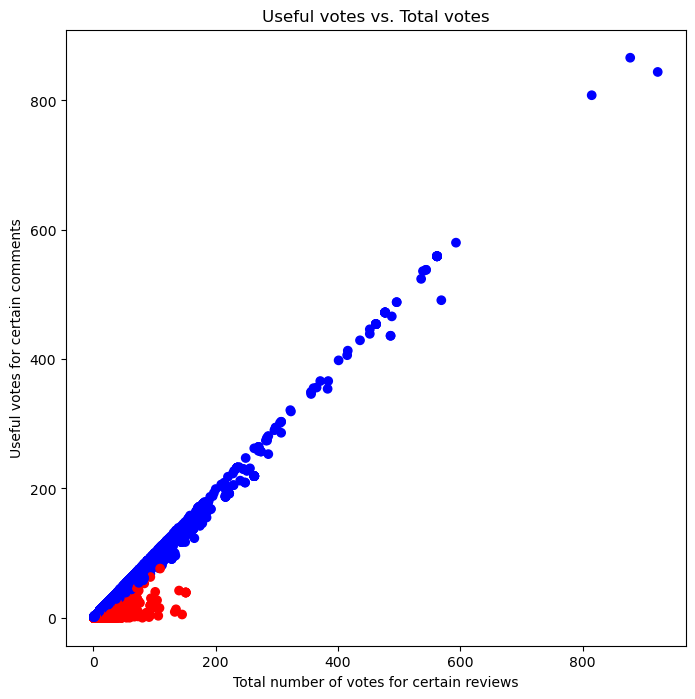

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(useful_reviews['HelpfulnessDenominator'], useful_reviews['HelpfulnessNumerator'], c=['red' if x < 0.7 else 'blue' for x in useful_reviews['HelpfulPortion']])
plt.ylabel('Useful votes for certain comments')
plt.xlabel('Total number of votes for certain reviews')
plt.title('Useful votes vs. Total votes')


We can see that most reviews that received votes have positive feedbacks, while some reviews have received less than 70% useful votes.

Let's see the content of an example among the 'outlier' examples

In [18]:
not_useful_reviews = useful_reviews.loc[(useful_reviews['HelpfulPortion'] < 0.3) & (useful_reviews['HelpfulnessDenominator'] > 15.0)]
not_useful_reviews

,Unnamed: 0,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,SummartAndText,HelpfulPortion
186,186,308270,B0014EW4C8,A3BXJ8HDRB4LO3,2,18,1,1299369600,V8 is not vegetarian,Vegetarians and vegans need to avoid this prod...,V8 is not vegetarianVegetarians and vegans nee...,0.111111
1125,1125,166876,B000EUJK2K,AHYRTWABDAG1H,4,27,1,1303948800,Where is the flavor of the Rainforest,This is the third product by this company I ha...,Where is the flavor of the RainforestThis is t...,0.148148
2761,2761,355175,B001E7654S,A2BAZCK92OWY3T,3,23,2,1170806400,Blarhhhh,"Kellogg's has gone off the deep end, and so ha...","BlarhhhhKellogg's has gone off the deep end, a...",0.130435
3030,3030,463740,B000GA94I8,ASQ7OEET37OZQ,0,19,4,1202428800,Nothing that can't be fixed.,Perhaps it's because I live in northern Canada...,Nothing that can't be fixed.Perhaps it's becau...,0.000000
3244,3244,549828,B004779XNW,A1W66FBLS1VXTE,0,17,1,1258934400,HOW many cups of coffee are included?,Okay..so there are 24 in a box X 2 boxes...and...,HOW many cups of coffee are included?Okay..so ...,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
23549,23549,189856,B001EO5Q64,AHJ18H704GL4Q,8,37,1,1312329600,Waste of my money.,"The Nutiva coconut oil was not moisturizing, w...",Waste of my money.The Nutiva coconut oil was n...,0.216216
23685,23685,232218,B0002YB40O,AI7RXVZ0KRS3I,2,18,5,1200960000,a bit of chinese flavor,"product is great,brings a bit of chinese flavo...","a bit of chinese flavorproduct is great,brings...",0.111111
23742,23742,312555,B002T0NXK8,A2N5YX7DLGPG3K,0,17,5,1215734400,"Oh, Yes....",There are so many beverages that people can dr...,"Oh, Yes....There are so many beverages that pe...",0.000000
24160,24160,446755,B0009F3QL6,A24WZWL84L02HC,1,21,1,1287878400,TERRIBLE:,"I HATE THIS TEA, I LOVE LICORICE, BUT I HATE T...","TERRIBLE:I HATE THIS TEA, I LOVE LICORICE, BUT...",0.047619


In [19]:
example1 = not_useful_reviews.loc[not_useful_reviews['UserId'] == 'A1W66FBLS1VXTE']
print('Total votes: {}, useful votes: {}'.format(example1['HelpfulnessDenominator'].values[0], example1['HelpfulnessNumerator'].values[0]))
print(example1['Summary'].values)
print(example1['Text'].values)

Total votes: 17, useful votes: 0
['HOW many cups of coffee are included?']
["Okay..so there are 24 in a box X 2 boxes...and that equals 25 servings?  Which then only equals 14 total ounces?<br />I can't buy this product without knowing exactly how much coffee I'm paying for."]


In [20]:
example2 = not_useful_reviews.loc[not_useful_reviews['UserId'] == 'A24WZWL84L02HC']
print('Total votes: {}, useful votes: {}'.format(example2['HelpfulnessDenominator'].values[0], example2['HelpfulnessNumerator'].values[0]))
print(example2['Summary'].values)
print(example2['Text'].values)

Total votes: 21, useful votes: 1
['TERRIBLE:']
['I HATE THIS TEA, I LOVE LICORICE, BUT I HATE THIS TEA, IT IS TERRIBLE, THE SMELL AND THE TASTE.  I HATE IT, I RATE THIS TEA A ZERO!  YUCK!!!']


### What about the relationship between score and usefulness? Let's try a scatterplot again

Text(0.5, 1.0, 'Useful votes vs. Total votes')

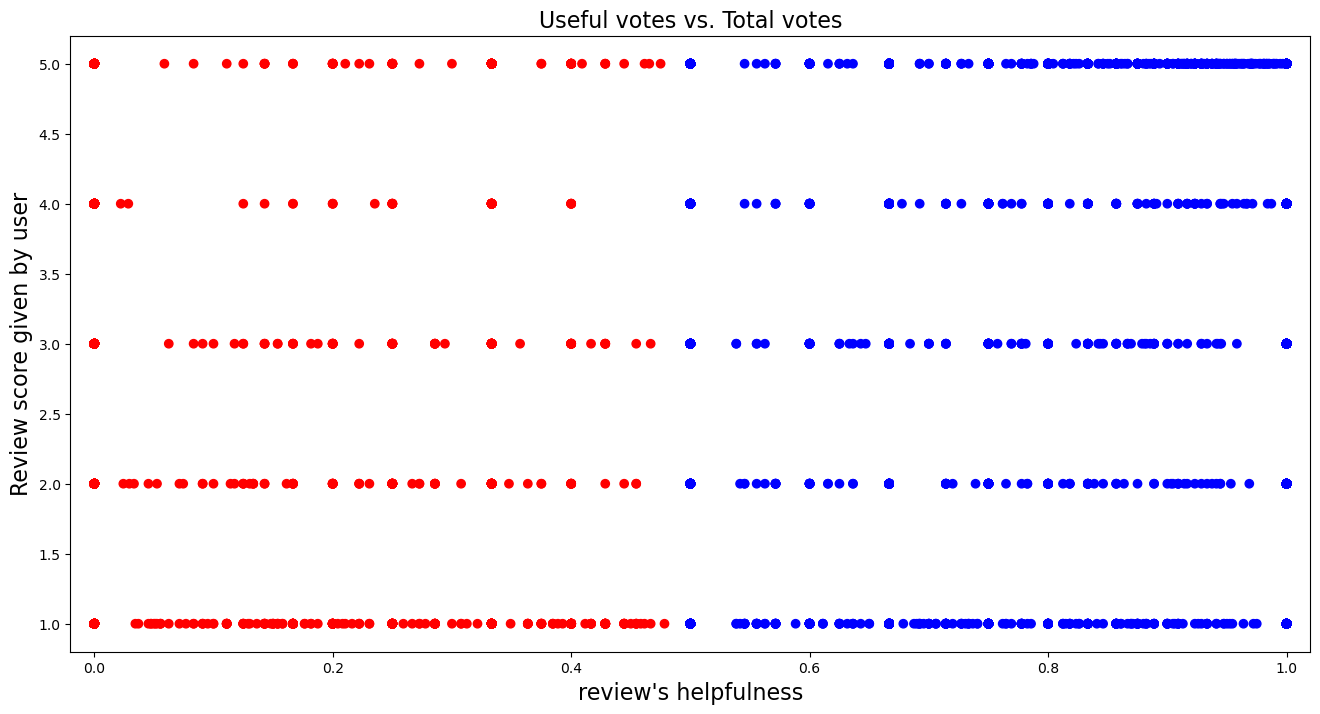

In [21]:
plt.figure(figsize=(16, 8))
plt.scatter(useful_reviews['HelpfulPortion'], useful_reviews['Score'], c=['red' if x < 0.5 else 'blue' for x in useful_reviews['HelpfulPortion']])
plt.xlabel('review\'s helpfulness', fontsize=16)
plt.ylabel('Review score given by user', fontsize=16)
plt.xlim((-0.02, 1.02))
plt.title('Useful votes vs. Total votes', fontsize=16)


For user scores above 2, it seems like more people would vote 'useful' for that vote. For reviews that gave only score value of 1, the portion of other users who thinks this negative review is not useful increases a lot.

In [22]:
useful_reviews.drop(columns=['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], inplace=True)
useful_reviews.head()

/var/folders/k2/7hr6hcfd5v58p9nhhf_brbbm0000gn/T/ipykernel_46257/519365411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_reviews.drop(columns=['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], inplace=True)


,Unnamed: 0,Id,ProductId,UserId,Score,Summary,Text,SummartAndText,HelpfulPortion
0,0,321334,B008RWUHA6,A30JPZ9TZ7I61U,5,"Tasty, healthy, and perfect for vegans ~","So despite this saying low-glycemic, it actual...","Tasty, healthy, and perfect for vegans ~So des...",1.0
1,1,543019,B00897UVVE,A3HEGKD16C4WZS,5,Authentic,"This is the real deal, not some cheap coffee p...","AuthenticThis is the real deal, not some cheap...",1.0
2,2,299018,B004AUKLCI,A2QZUDPHCF6YRR,5,sweet nut and fruit gift,The item arrived as scheduled in excellent con...,sweet nut and fruit giftThe item arrived as sc...,1.0
3,3,357399,B001CJE4IC,A23TISZZ4Y937H,5,Nice large box,This was for my mother who will only chew Chic...,Nice large boxThis was for my mother who will ...,1.0
5,5,436554,B000CQ01JW,A3CC24EQUYSGGX,4,Grandson loves it...,"I got an order of this for myself, since it ha...",Grandson loves it...I got an order of this for...,1.0
